#O Problema do Centro de Chebyshev
Escrito por: Lucka de Godoy Gianvechio


#Apresentando o problema
 Dado um polígono convexo, o problema consiste basicamente em encontrar o centro da esfera de maior raio contida inteiramente no polígono. Podemos denotar o polígono como $P = \{x \in \mathbf{R}^n | a_i'x \leq b_i, i = 1,2,\dots,m \}$ o conjunto de todos os pontos contidos dentro de um conjunto de restrições. Perceba que o polígono em questão pode ter quantas dimensões forem desejadas, e as fronteiras que delimitam esse polígono são dadas por hiperplanos em $\mathbf{R}^n$. Os hiperplanos serão dados pela matriz de coeficientes $A$ e pelo vetor $b$. A matriz de pesos é da forma:

$$
A = \begin{pmatrix}
a_1' \\
a_2' \\
\vdots \\
a_n' \\
\end{pmatrix}
$$

Tal que $a_i'$ é vetor linha com os coeficientes, e teremos a seguinte equação que caracteriza o polígono: $$ Ax \leq b $$

Devemos então encontrar a maior esfera em $\mathbf{R}^n$ que satisfaça as restrições dadas pela formula acima. 

#Encontrando uma solução

Vamos começar definindo os pontos dentro da esfera. Seja $B(c, r) = \{p \in \mathbf{R}^n|p = c + t, \text{onde } ||t|| \leq r \}$ a bola de centro $c \in \mathbf{R}^n$ e raio $r \geq 0$, ou seja, o conjunto de todos os pontos gerados a partir da soma do centro e qualquer vetor com módulo menor ou igual ao raio.

Para que valham as restrições devemos garantir que $a_i'p \leq b_i, \forall p \in B(c, r)$. Tome $C = \{\lambda \in \mathbf{R}; \lambda = a_i'p\}$ o conjunto de todos os produtos escalares de vetores $p \in B(c, r)$ por $a_i$, e seja $\lambda^* = \text{max}(C)$, é evidente que $\lambda \leq \lambda^*,  \forall \lambda \in C$, e para que $B(c, r) \subset P$ devemos ter $\lambda^* \leq b_i$. Portanto o problema é:

\begin{alignat*}{2}
  & \text{Maximizar: } & & r\\
   & \text{Sujeito à: }& \quad & \lambda^*=max(a_i'p) \leq b_i\begin{aligned}[t]
                     & ,& i & =1, \dots, m\\
                \end{aligned}
\end{alignat*}

Vamos encontrar o valor de $\lambda^*$. Temos que, geometricamente, a expressão $a_i'p$ representa a projeção do vetor $p$ no vetor $a_i$. Sabemos que $a_i'p = ||a_i||*||p||*cos(\theta)$ onde $\theta$ é o angulo entre os vetores. Dado um vetor $a_i$, o maior valor para a expressão será dado quanto maior o valor de $||p||$, ou seja, quando $t := t^*\text{ e }||t^*|| = r$, e quando os vetores forem paralelos, isto é, quando $\theta = 0$. Portanto teremos:
$$
\lambda^* = a_i'c + a_i't^* = a_i'c + a_i'\frac{a_i}{||a_i||}r = a_i'c + \frac{||a_i||^2}{||a_i||}r = a_i'c + ||a_i||r
$$

Portanto, o problema pode ser representado pelo problema de otimização linear definido por:

\begin{alignat*}{2}
  & \text{Maximizar: } & & r\\
   & \text{Sujeito à: }& \quad & a_i'c + ||a_i||r \leq b_i\begin{aligned}[t]
                     & ,& i & =1, \dots, m\\
                \end{aligned}
\end{alignat*} $\square$

#Uma aplicação prática em Python

Agora, temos uma forma explicita de encontrar o Centro de Chebyshev, basta encontrar a solução ótima para o programa linear acima. Neste notebook, vamos tratar de encontrar uma solução para as seguintes configurações:

$$
A = \begin{pmatrix}
 5 &  5 \\
-2 & -6 \\
-4 &  2 \\
 3 &  1
\end{pmatrix}
\quad\text{e}\quad
b = \begin{pmatrix}
 20  \\
 20 \\
 20 \\
 15
\end{pmatrix}
$$

Ou seja, temos um problema no $\mathbf{R}^2$. Vamos começar importando as funções que iremos utilizar.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog
from IPython.display import clear_output

As funções à seguir são responsaveis por desenhar as retas que representam as fronteiras do polígono, e a região compreendida dentro delas.

In [2]:
def desenha_reta(parametros = None, restricao = None, cor = None):
  pontos_x = []
  pontos_y = []
  for x in np.linspace(-10, 10, 100):
    pontos_x.append(x)
    pontos_y.append((restricao - parametros[0]*x)/parametros[1])

  plt.plot(pontos_x, pontos_y, c=cor)

def pinta_região(ini_x = -10, end_x = 10, ini_y = -10, end_y = 10, a = None, b = None, cor = 'r'):
  pontos_x = []
  pontos_y = []
  for x in np.linspace(ini_x, end_x, 100):
    for y in np.linspace(ini_y, end_y, 100):
      if (a * np.matrix([[x], [y]]) <= np.array(b).reshape((-1,1))).all():
        pontos_x.append(x)
        pontos_y.append(y)
  plt.scatter(x = pontos_x, y = pontos_y, c = cor, s = 0.1)

Vamos mostrar no plano $xy$ como fica o conjunto dos pontos dentro do polígono executando o código a seguir:

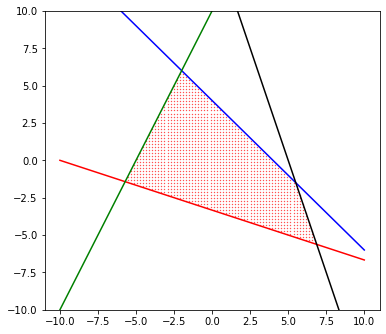

In [3]:
reta1 = [5, 5]
reta2 = [-2, -6]
reta3 = [-4, 2]
reta4 = [3,1]

b = [20, 20, 20, 15]

plt.figure(figsize=(6,5.5))

desenha_reta(reta1, b[0], cor= 'b')
desenha_reta(reta2, b[1], cor = 'r')
desenha_reta(reta3, b[2], cor = 'g')
desenha_reta(reta4, b[3], cor = 'k')

pinta_região(a = np.matrix([reta1, reta2, reta3, reta4]), b = b)


plt.ylim(-10, 10)
plt.show()

Essa visualização é muito boa para criarmos intuições e para estimar mais ou menos qual deveria ser o resultado e poder identificar alguns problemas no futuro!

Agora, vamos estruturar a matriz de coeficientes para nosso programa linear. Teremos a seguinte estrutura:
$$
A= \begin{pmatrix}
a_1' & ||a_1|| \\
a_2' & ||a_2||  \\
a_3' & ||a_3||  \\
a_4' & ||a_4|| 
\end{pmatrix}
$$
Teremos então, em uma matriz do numpy:

In [4]:
A = np.matrix([reta1 + [np.linalg.norm(reta1)],
              reta2 + [np.linalg.norm(reta2)],
              reta3 + [np.linalg.norm(reta3)],
              reta4 + [np.linalg.norm(reta4)]])

A

matrix([[ 5.        ,  5.        ,  7.07106781],
        [-2.        , -6.        ,  6.32455532],
        [-4.        ,  2.        ,  4.47213595],
        [ 3.        ,  1.        ,  3.16227766]])

Agora, basta passarmos nossos dados para a função *linprog* do scipy e teremos nossa resposta. Um detalhe importante é que por padrão a função *linprog* considera as variáveis como positivas, como nesse caso não temos essa limitação, devemos explicitar que não devem ter limitações diretamente nas variaveis, setando nossas *bounds* para tuplas com *None*.

In [5]:
otimizador = linprog(c = [0,0,-1], A_ub = A, b_ub = b, bounds = [(None, None) for k in range(A.shape[1])])
clear_output()

otimizador

     con: array([], dtype=float64)
     fun: -3.2692800512764455
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([4.81100315e-09, 9.32018906e-10, 6.56694255e-10, 7.49384076e+00])
  status: 0
 success: True
       x: array([-1.10437592,  0.48091573,  3.26928005])

O objeto apresenta um resumo do programa resolvido, incluindo soluções ótimas e o resultado da função custo. Nosso Centro de Chebyshev pode ser visto em *x* no resumo acima. Agora, vamos desenhar a solução que obtivemos e verificar nossa resposta.

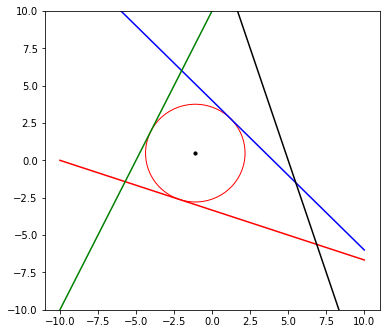

In [6]:
plt.figure(figsize=(6,5.5))

desenha_reta(reta1, b[0], cor= 'b')
desenha_reta(reta2, b[1], cor = 'r')
desenha_reta(reta3, b[2], cor = 'g')
desenha_reta(reta4, b[3], cor = 'k')

centro = (otimizador.x[0], otimizador.x[1])
raio = otimizador.x[2]
circle1 = plt.Circle(centro, raio, color='r', fill = False)
plt.gca().add_patch(circle1)

plt.scatter(centro[0], centro[1], s = 10, c = 'k')

plt.ylim(-10, 10)
plt.show()

De fato, o programa funciona! Podemos utilizar essa estrutura para qualquer polígono convexo em $\mathbf{R}^n$, não só no caso bidimensional. Espero ter ajudado! Para mais informações sobre o problema veja outras referências e resoluções:

[1] Welke, Pascal, and Christian Bauckhage. ML2R Coding Nuggets: Solving Linear Programming Problems. Technical Report. MLAI, University of Bonn, 2020.

[2] Lee, Chungmok, and Sungsoo Park. "Chebyshev center based column generation." Discrete Applied Mathematics 159.18 (2011): 2251-2265.

[3] https://see.stanford.edu/materials/lsocoee364a/04ConvexOptimizationProblems.pdf (Acessado em: 26/08/2021)

[4] Boyd, Stephen, Stephen P. Boyd, and Lieven Vandenberghe. Convex optimization. Cambridge university press, 2004.